# Preview Data
Ce notebook a pour objectif de pré-visualiser les données des utilisateurs sous différents « angles » afin de mieux les comprendre ou de faire ressortir des facteurs de compréhension de la problématique.

Par la même occasion, nous étudierons les différentes corrélations entre les attributs.

In [1]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output, display
from sklearn.model_selection import train_test_split

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["Tweet"]
user_collection = db["users"]

In [3]:
users = list(user_collection.find({}))
users = pd.DataFrame(users)
users = users.drop(columns=["_id","user_id","last_tweet_published_id","tweet_ids","friends_count","followers_count"])

## Distribution des variables

In [4]:
users.describe()

,hashtag_frequency,verified,statuses_count,favourites_count,age_account,ratio_friends_followers,avg_tweet_length,tweet_frequency,nb_sensitive_tweets,Ap,visibility,ratio_sensitive_tweets,ratio_punctuation_tweets,avg_tweet_levenshtein_similarity
count,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06,1.843439e+06
mean,1.488076e+00,9.808299e-03,1.767360e+04,8.751373e+03,1.735728e+03,2.732320e+00,1.079493e+02,1.183417e+01,2.524792e-02,1.412206e-03,1.539910e-01,9.341535e-03,7.120023e-02,3.159548e+01
std,1.415785e+00,9.854999e-02,4.047846e+04,2.203021e+04,1.038434e+03,7.692801e+00,3.147568e+01,2.936930e+01,5.516997e-01,3.500806e-03,9.819461e-02,9.089836e-02,3.493993e-02,4.628203e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.711806e-02,-1.000000e+00,9.000000e+00,2.687459e-04,0.000000e+00,6.398712e-08,0.000000e+00,0.000000e+00,7.142857e-03,0.000000e+00
25%,5.000000e-01,0.000000e+00,1.104000e+03,4.430000e+02,8.164984e+02,6.931507e-01,8.800000e+01,1.130927e+00,0.000000e+00,1.363323e-04,7.558016e-02,0.000000e+00,4.664817e-02,0.000000e+00
50%,1.000000e+00,0.000000e+00,5.203000e+03,2.163000e+03,1.843173e+03,1.195876e+00,1.130000e+02,3.874877e+00,0.000000e+00,4.639399e-04,1.329816e-01,0.000000e+00,6.521739e-02,0.000000e+00
75%,2.000000e+00,0.000000e+00,1.788200e+04,7.919000e+03,2.582968e+03,2.640625e+00,1.395000e+02,1.155824e+01,0.000000e+00,1.379767e-03,1.903830e-01,0.000000e+00,9.090909e-02,8.200000e+01
max,2.500000e+01,1.000000e+00,8.904194e+06,1.718515e+06,1.769979e+04,2.974000e+03,4.160000e+02,2.742132e+03,2.010000e+02,3.264443e-01,1.510615e+00,1.000000e+00,8.285714e-01,2.973333e+02


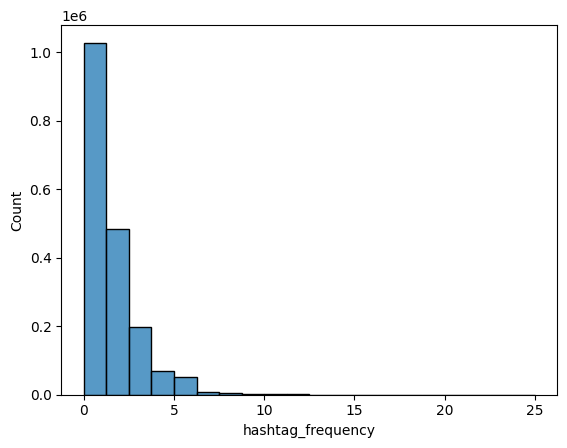

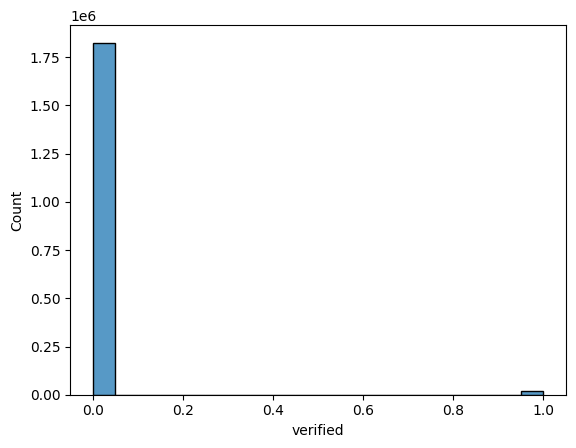

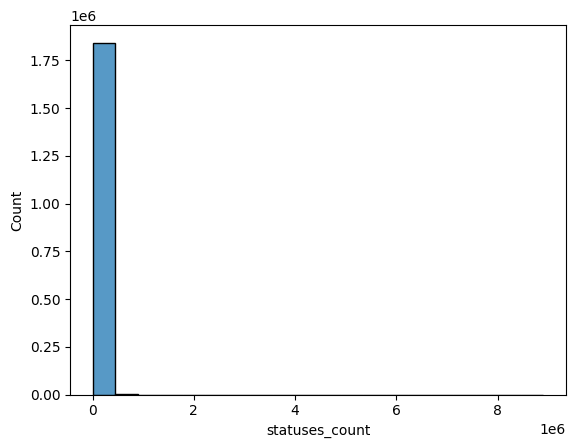

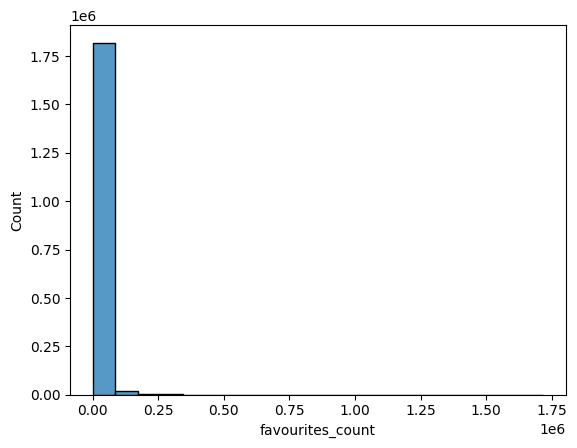

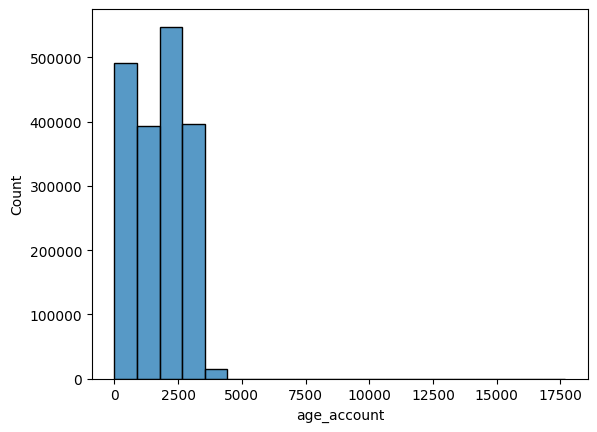

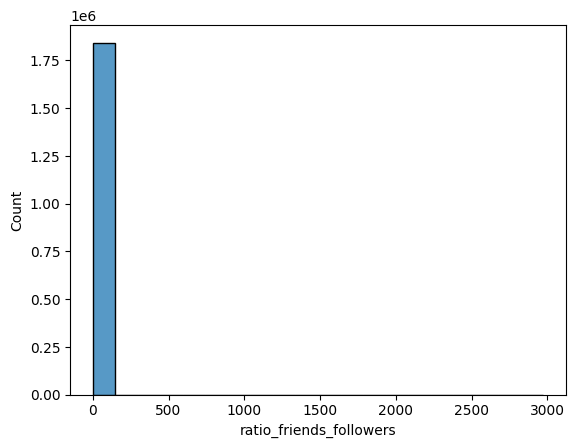

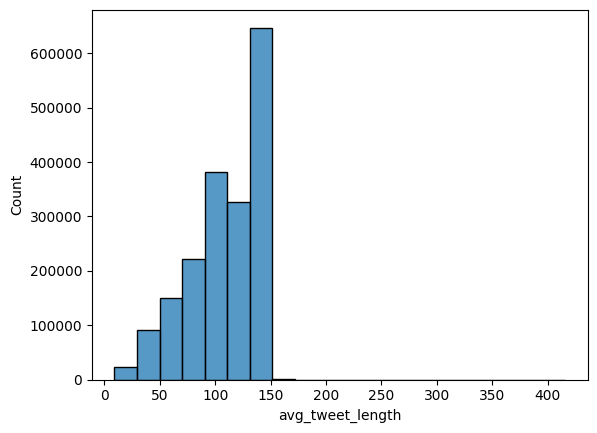

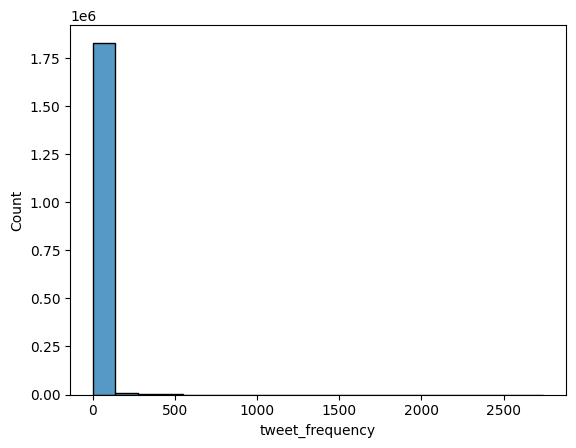

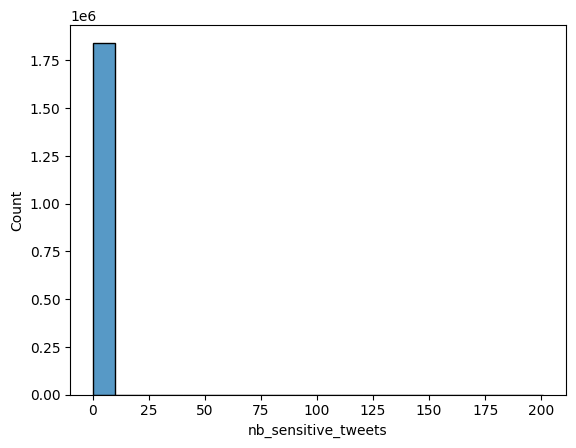

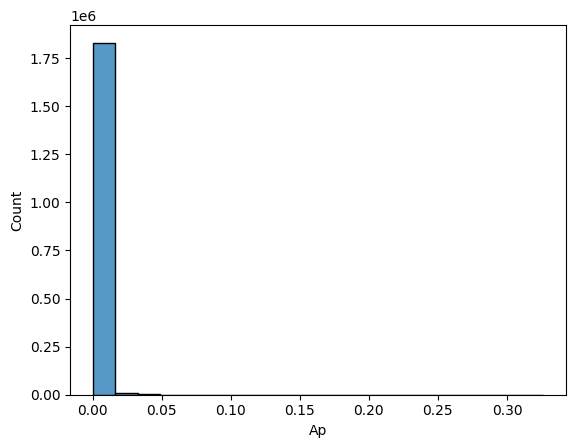

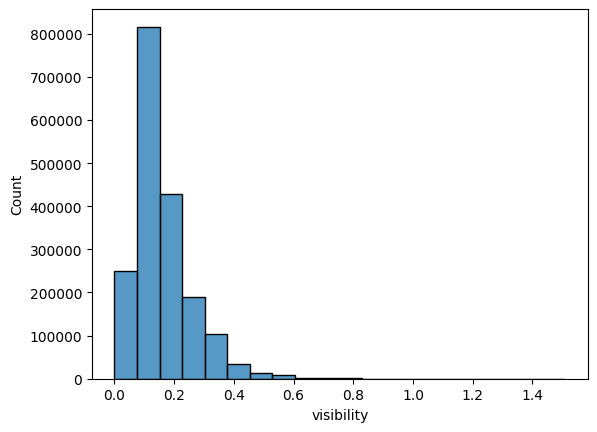

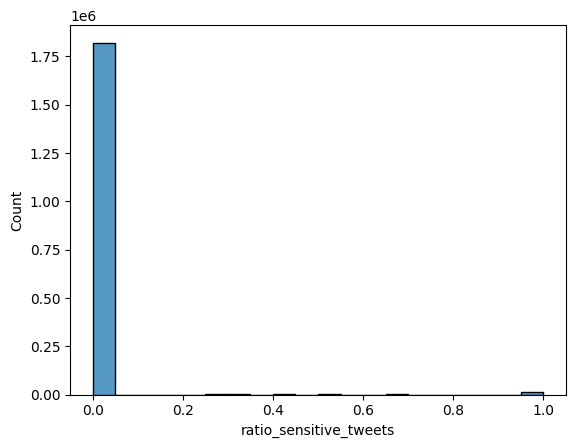

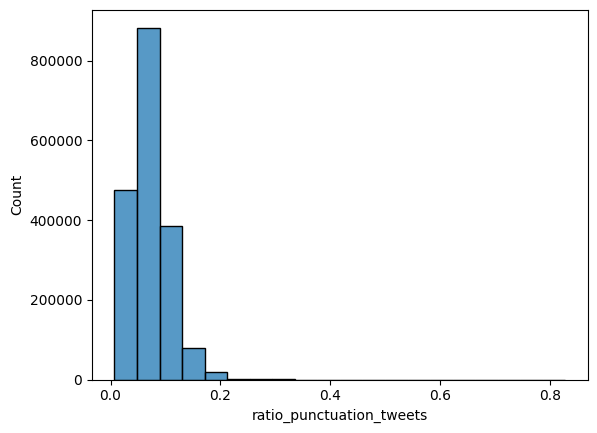

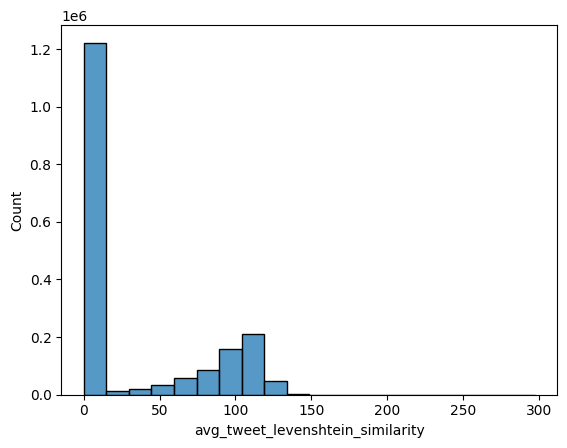

In [5]:
for col in users.columns:
    sns.histplot(users[col], bins=20)
    plt.show()

In [6]:
def print_occurences(new_value):
    attribute = new_value['new']
    clear_output()
    display(dropdown)
    print('>>>>>>>>>> COLUMN : ', attribute, ' <<<<<<<<<<')
    print('Cela peut prendre du temps en fonction des attributs.')
    counts = users[attribute].value_counts()
    counts_df = pd.DataFrame({'Valeur': counts.index, 'Occurrences': counts.values})
    print(counts_df.sort_values('Occurrences', ascending=False).to_string(index=False))

In [7]:
dropdown = widgets.Dropdown(options=users.columns)
dropdown.observe(print_occurences, names='value')
dropdown

Dropdown(options=('hashtag_frequency', 'verified', 'statuses_count', 'favourites_count', 'age_account', 'ratio…

## Autocorrélation des attributs
Analyse de la correlation entre les variables

CPU times: total: 19.7 s
Wall time: 26.8 s


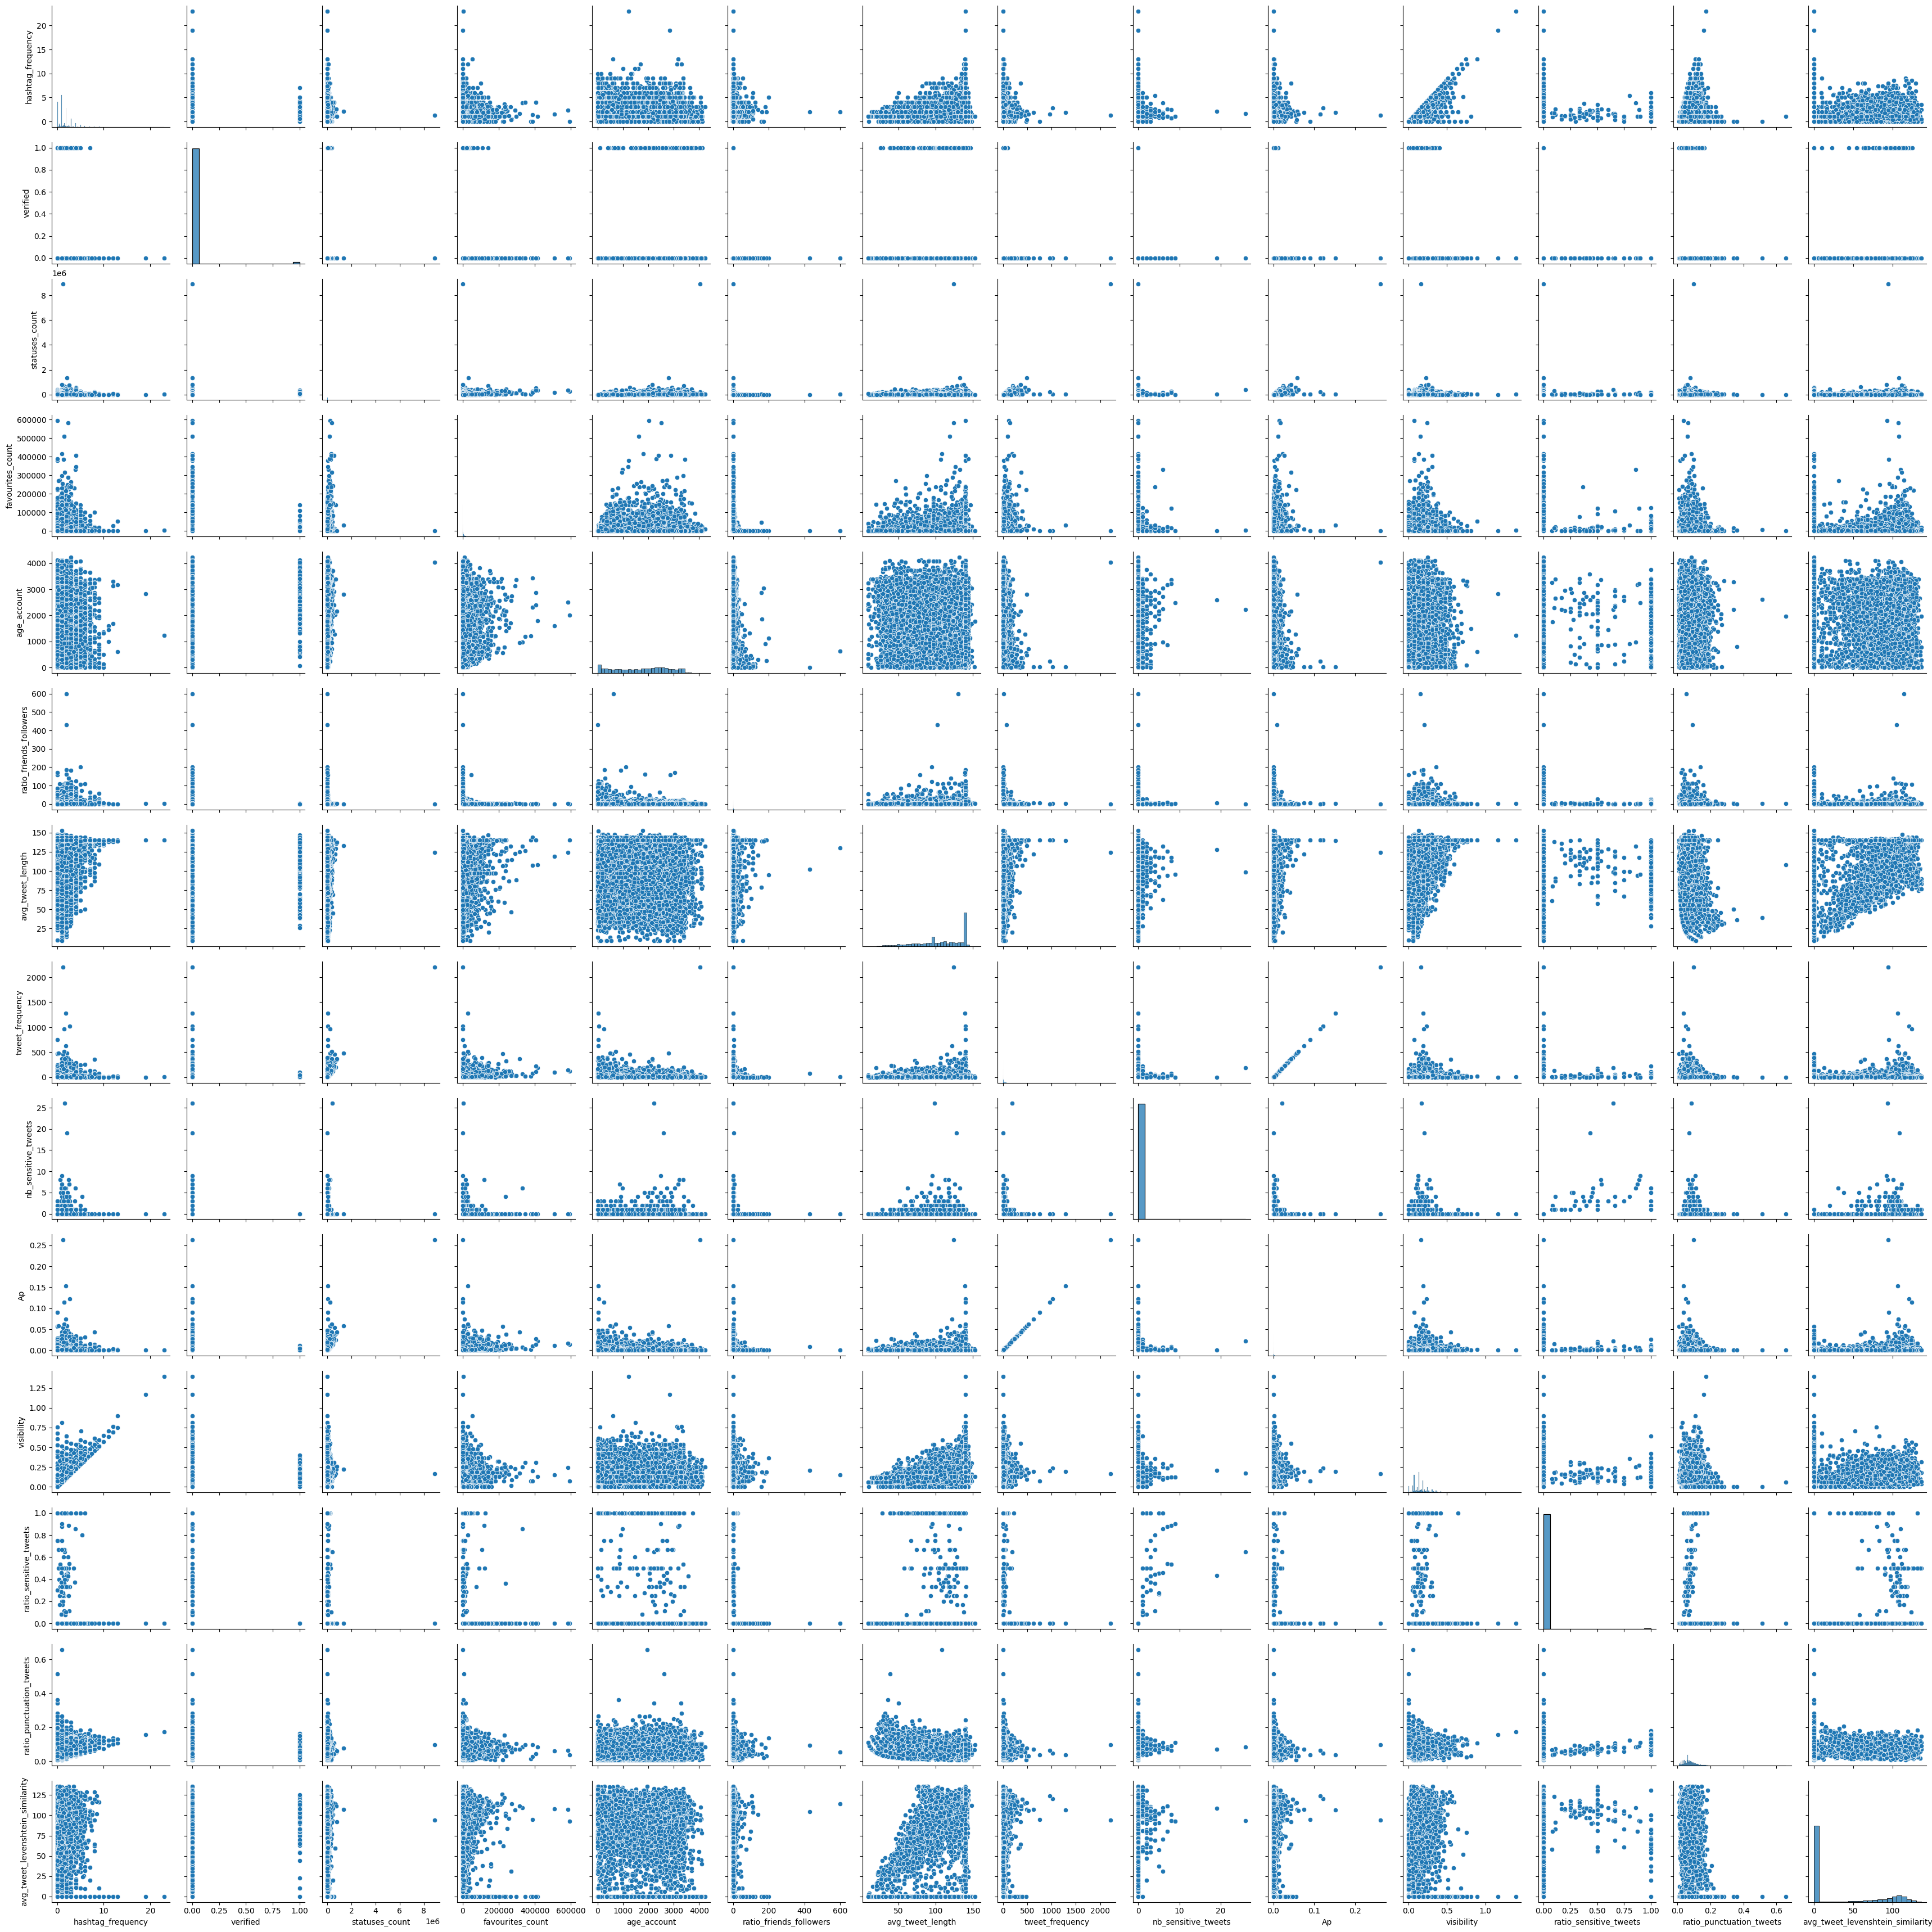

In [11]:
%%time
some_users,_ = train_test_split(users,train_size=0.01)
sns.pairplot(some_users)

On constate une corrélation évidente entre tweet_frequency et l'agressivité. Ceci peut s'expliquer par le fait que l'aggrésivité est calculé à l'aide de tweet_frequency. Pour l'analyse comportementale des utilisateurs, il est donc inutile d'utiliser tweet_frequency.
De même pour avg_tweet_levenshtein_similarity et avg_tweet_length, hashtag_frequency et visibility.

In [10]:
users.corr()

,hashtag_frequency,verified,statuses_count,favourites_count,age_account,ratio_friends_followers,avg_tweet_length,tweet_frequency,nb_sensitive_tweets,Ap,visibility,ratio_sensitive_tweets,ratio_punctuation_tweets,avg_tweet_levenshtein_similarity
hashtag_frequency,1.000000,-0.002601,-0.022997,-0.038590,-0.064859,0.047570,0.201824,0.002636,0.004415,0.003094,0.850328,0.000084,0.168990,0.062230
verified,-0.002601,1.000000,0.059340,-0.003909,0.098965,-0.033056,0.023308,0.009479,-0.002968,0.009384,-0.015257,-0.007871,-0.003657,0.025713
statuses_count,-0.022997,0.059340,1.000000,0.372334,0.218406,-0.091863,0.004650,0.635971,0.037785,0.634799,-0.002850,0.034697,0.003756,0.113739
favourites_count,-0.038590,-0.003909,0.372334,1.000000,0.054730,-0.068221,-0.003617,0.313594,0.016305,0.312873,-0.006404,0.016543,-0.005443,0.059363
age_account,-0.064859,0.098965,0.218406,0.054730,1.000000,-0.160876,-0.071292,-0.094016,0.002940,-0.095406,-0.096843,0.002687,-0.000235,0.014017
ratio_friends_followers,0.047570,-0.033056,-0.091863,-0.068221,-0.160876,1.000000,0.046806,-0.034326,-0.003863,-0.033637,0.054069,-0.005192,-0.010874,-0.014995
avg_tweet_length,0.201824,0.023308,0.004650,-0.003617,-0.071292,0.046806,1.000000,0.041055,-0.005274,0.041187,0.374126,-0.033106,-0.518350,0.094166
tweet_frequency,0.002636,0.009479,0.635971,0.313594,-0.094016,-0.034326,0.041055,1.000000,0.033080,0.999839,0.031288,0.027792,-0.012253,0.110063
nb_sensitive_tweets,0.004415,-0.002968,0.037785,0.016305,0.002940,-0.003863,-0.005274,0.033080,1.000000,0.033230,0.003664,0.353654,0.016926,0.037877
Ap,0.003094,0.009384,0.634799,0.312873,-0.095406,-0.033637,0.041187,0.999839,0.033230,1.000000,0.031637,0.027738,-0.012191,0.110439
